In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("salary.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
pip install missingno

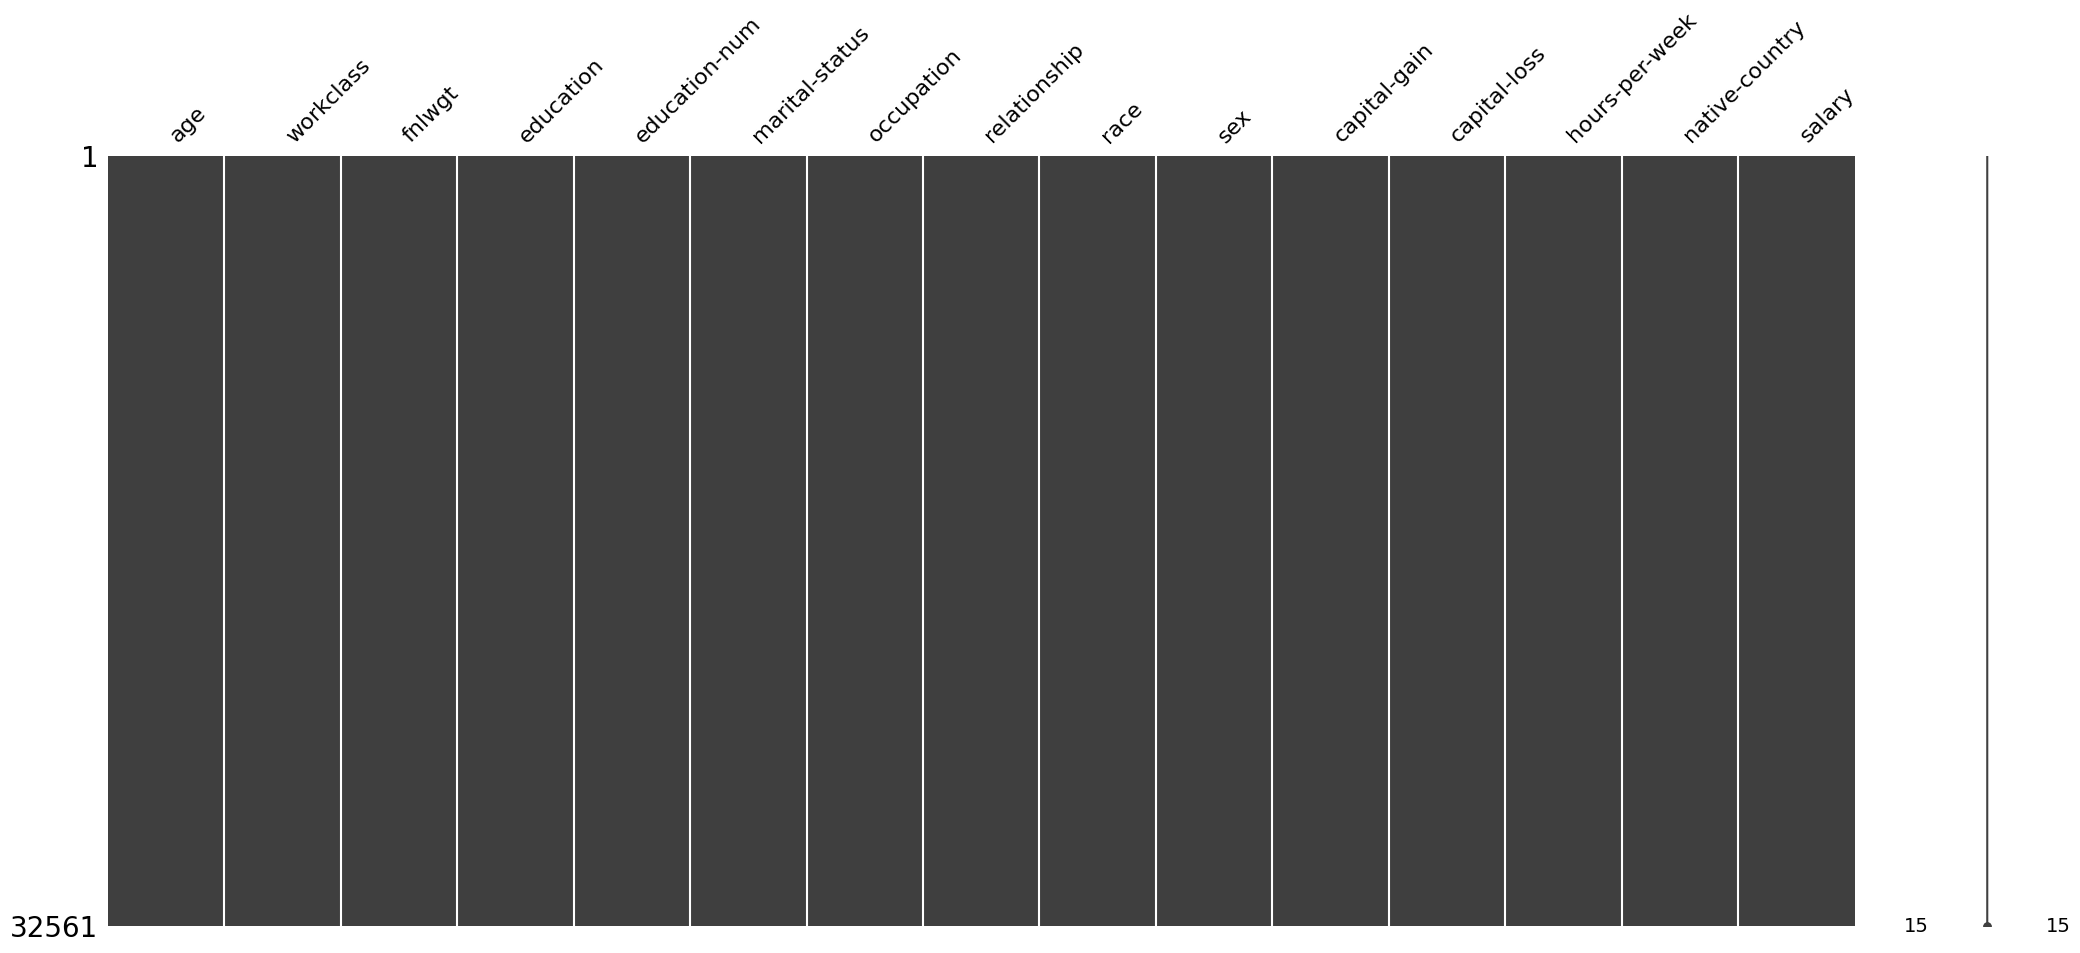

In [6]:
import missingno as msno
msno.matrix(df)
plt.show()

In [7]:
df.duplicated().sum()

24

In [8]:
df = df.drop_duplicates()

In [9]:
df.select_dtypes(include="object").nunique()

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
sex                2
native-country    42
salary             2
dtype: int64

In [10]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [14]:
df['native-country'] = df['native-country'].str.replace('?','United States')

C:\Users\Patil\AppData\Local\Temp\ipykernel_29276\1553339223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['native-country'] = df['native-country'].str.replace('?','United States')


In [15]:
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'UnitedStates',
       'Mexico', 'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada',
       'Germany', 'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia',
       'Cambodia', 'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti',
       'Portugal', 'Dominican-Republic', 'El-Salvador', 'France',
       'Guatemala', 'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [16]:
def fun(country):
        if country in ['UnitedStates','United-States', 'Canada', 'Mexico']:
            return 'North America'
        elif country in ['Haiti','Cuba','Jamaica', 'Honduras', 'Puerto Rico', 'Dominican Republic']:
            return 'Caribbean'
        elif country in ['Iran','India', 'Philippines']:
            return 'Asia'
        elif country in ['South Africa']:
            return 'Africa'
        elif country in ['South','Columbia','Cambodia', 'Ecuador', 'Peru']:
            return 'South America'
        elif country in ['Cambodia', 'Thailand', 'Laos', 'Taiwan', 'Vietnam', 'Hong Kong']:
            return 'Southeast Asia'
        elif country in ['Yugoslavia','England','Poland','Holland','Hungary','Germany','Italy', 'Portugal', 'France', 'Ireland', 'Scotland', 'Greece']:
            return 'Europe'
        elif country in ['China', 'Japan']:
            return 'East Asia'
        elif country in ['Nicaragua']:
            return 'Central America'
        else:
            return 'Others'

In [17]:
df['native-country'] = df['native-country'].apply(fun)

C:\Users\Patil\AppData\Local\Temp\ipykernel_29276\1211175592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['native-country'] = df['native-country'].apply(fun)


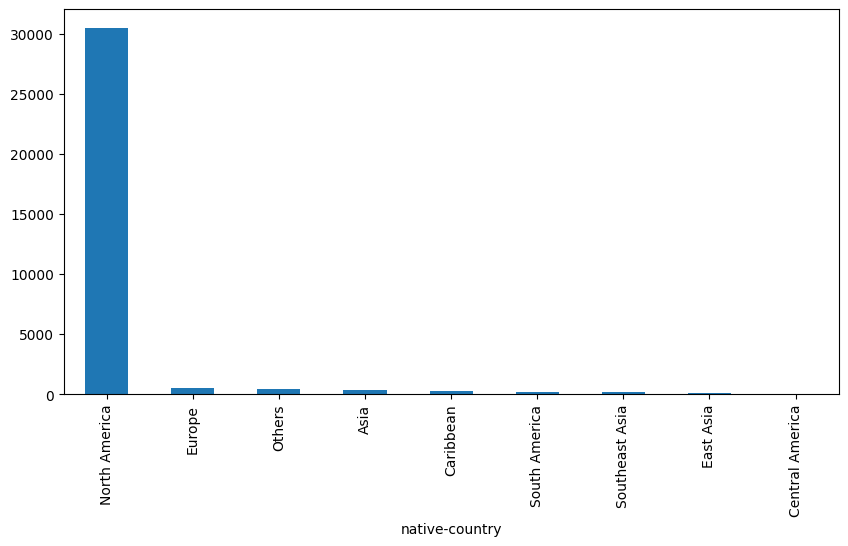

In [18]:
plt.figure(figsize=(10,5))
df['native-country'].value_counts().plot(kind='bar')
plt.show()

In [19]:
df['occupation'] = df['occupation'].str.replace('?','Machine-op-inspct')

C:\Users\Patil\AppData\Local\Temp\ipykernel_29276\70283354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['occupation'] = df['occupation'].str.replace('?','Machine-op-inspct')


In [20]:
df['workclass'] = df['workclass'].str.replace('?','Private')

C:\Users\Patil\AppData\Local\Temp\ipykernel_29276\3729858375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['workclass'] = df['workclass'].str.replace('?','Private')


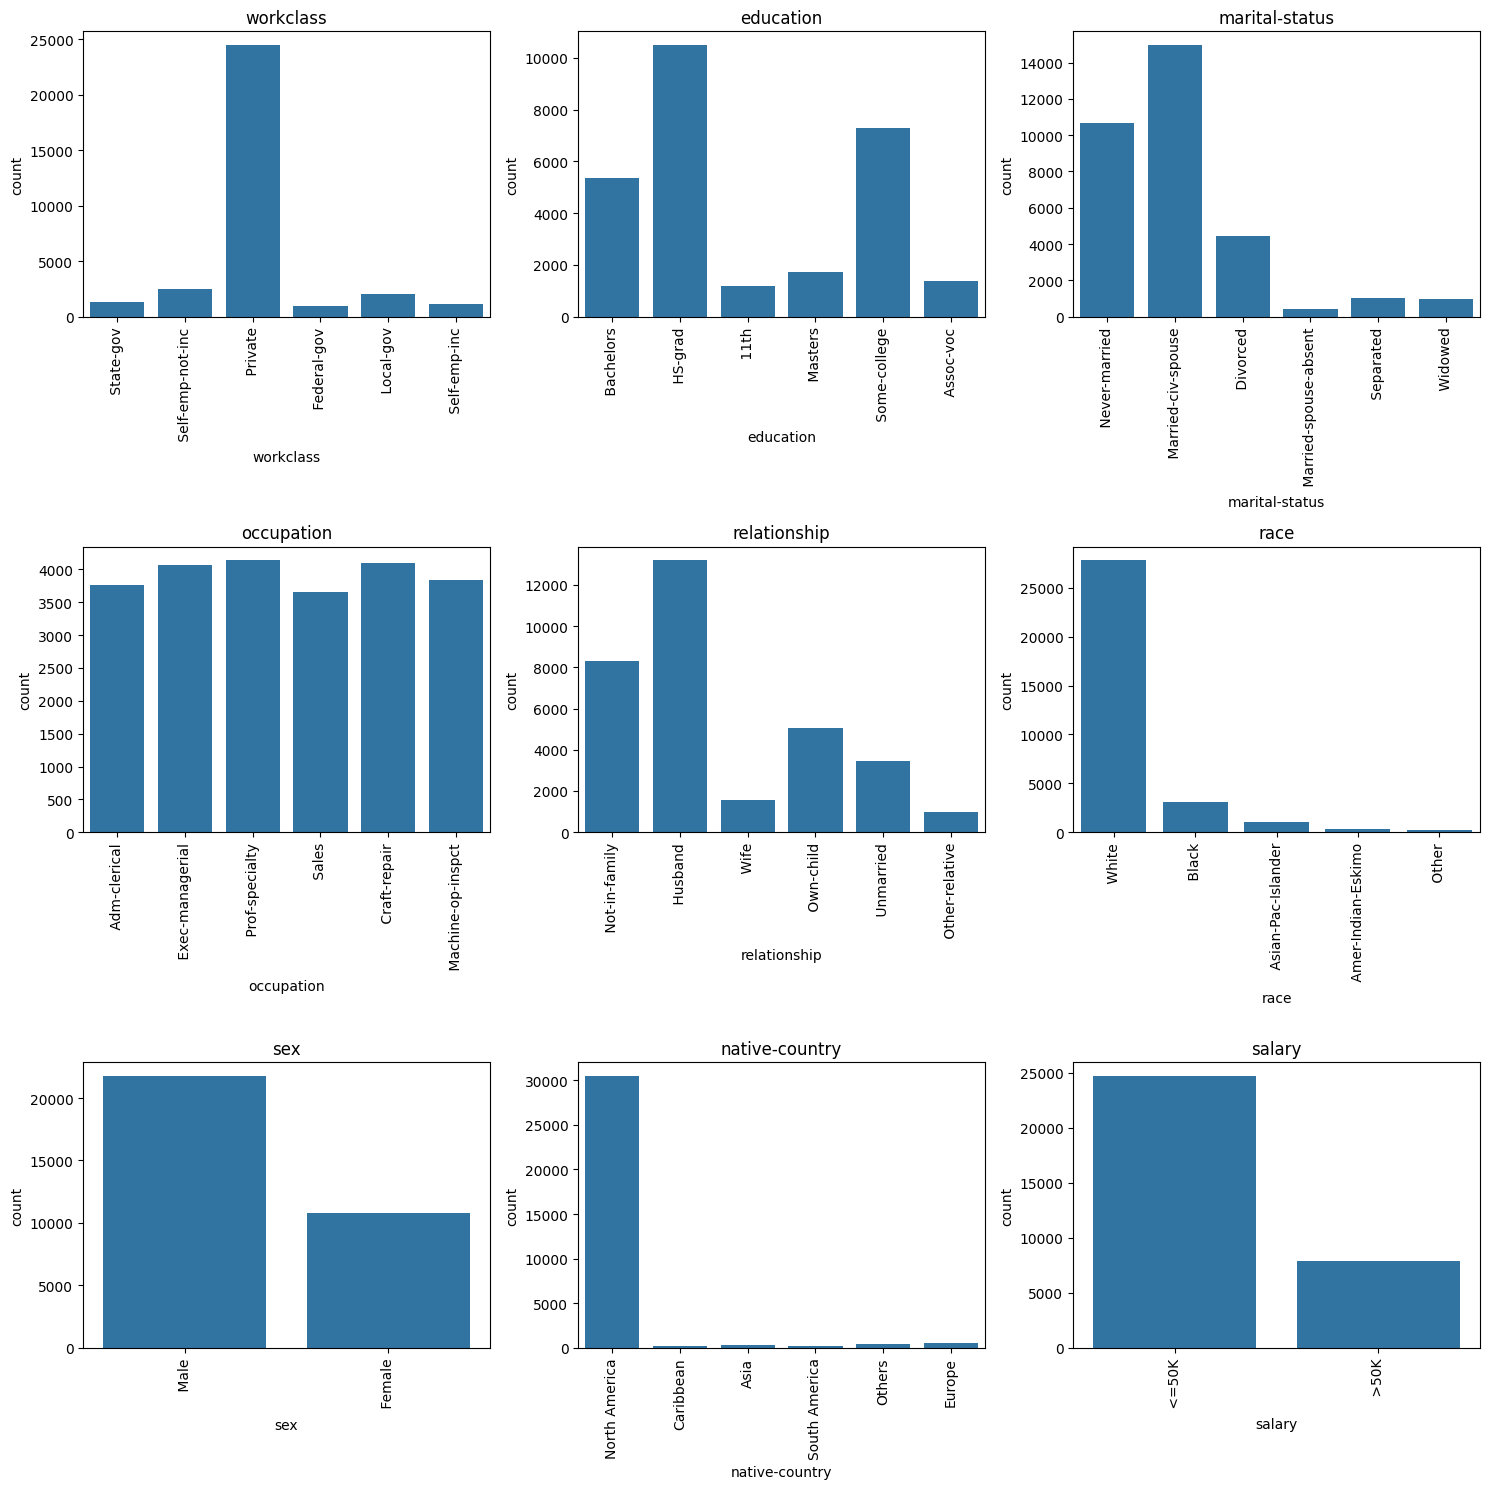

In [21]:

cat_vars = df.select_dtypes(include='object').columns.tolist()

num_cols = len(cat_vars)
num_rows = (num_cols + 2 ) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

for i, var in enumerate (cat_vars):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var,data=filtered_df,ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis ='x',rotation=90)

if num_cols < len(axs):
  for i in range(num_cols , len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

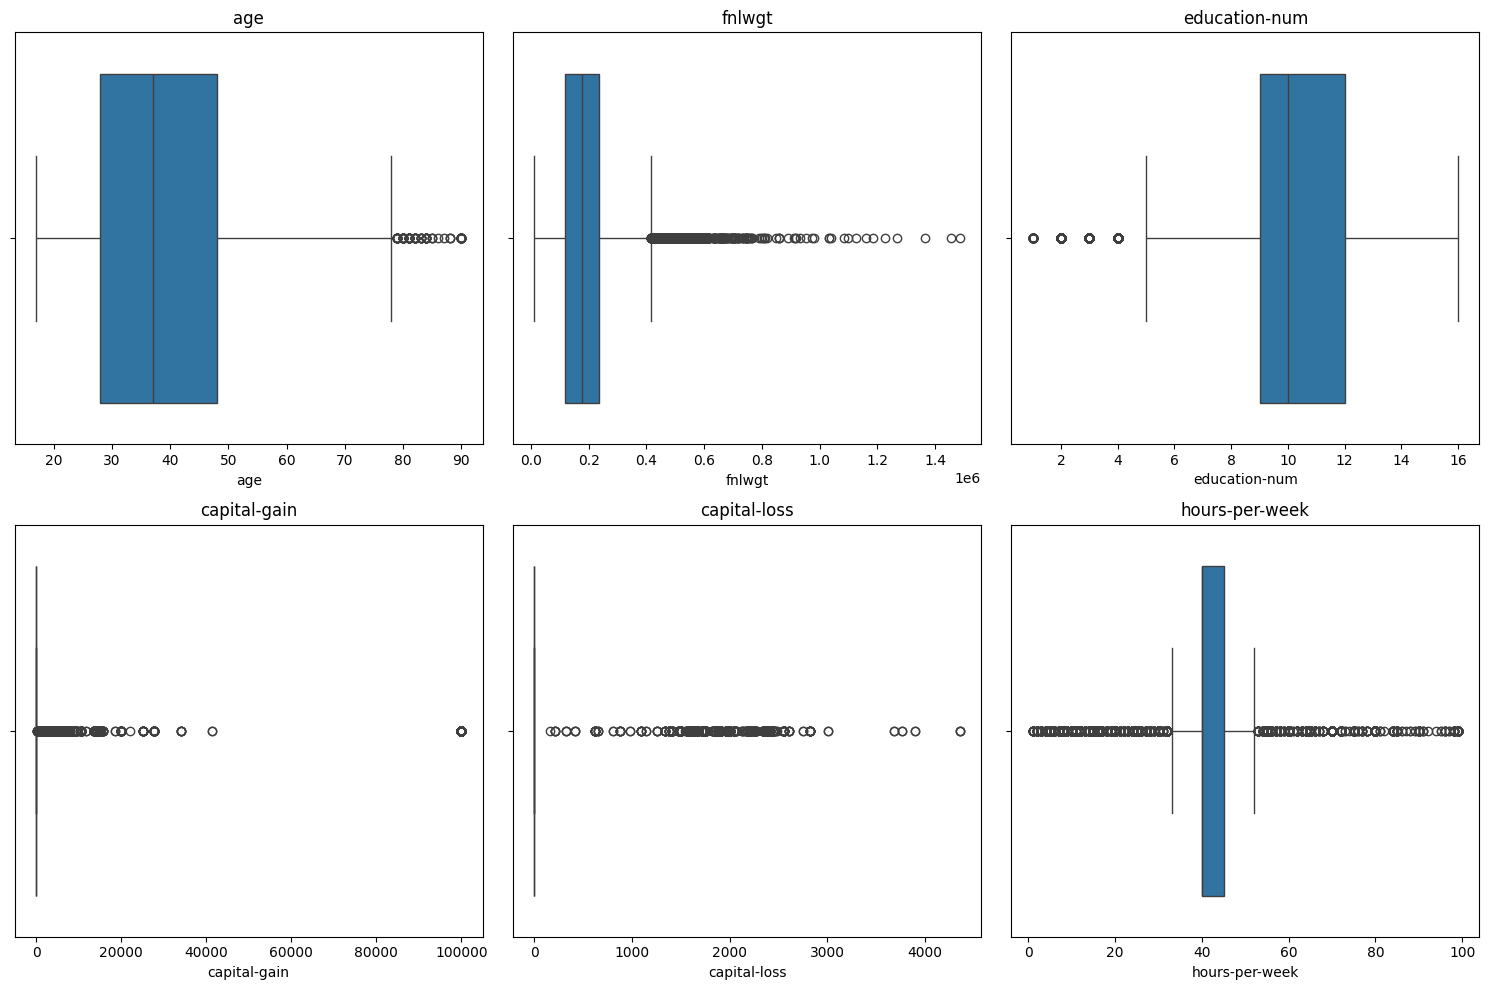

In [22]:

num_vars = df.select_dtypes(include=['int','float']).columns.tolist()

num_cols = len(num_vars)
num_rows = (num_cols + 2 ) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

for i, var in enumerate (num_vars):
    sns.boxplot(x=df[var],ax=axs[i])
    axs[i].set_title(var)

if num_cols < len(axs):
  for i in range(num_cols , len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

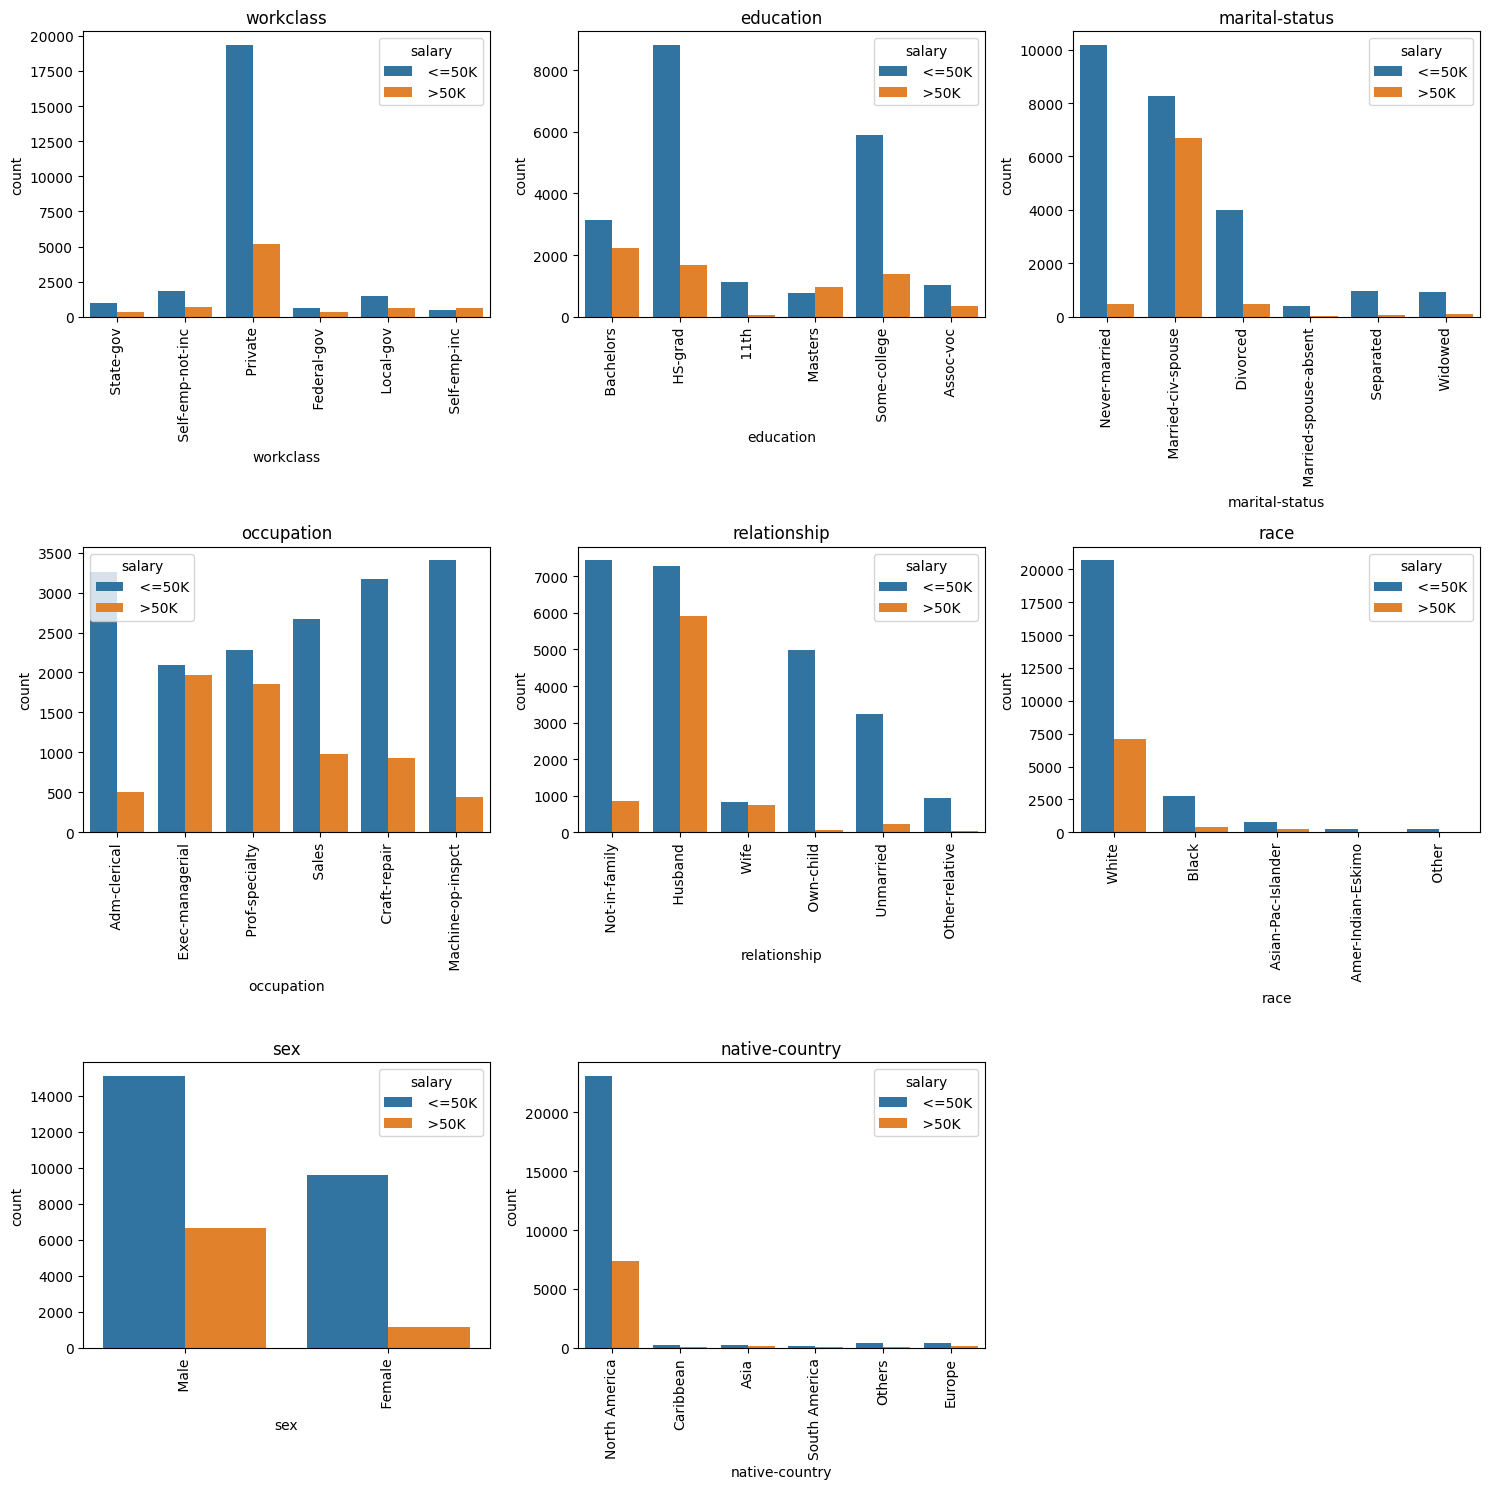

In [23]:
cat_vars = df.select_dtypes(include='object').columns.tolist()

if 'salary' in cat_vars:
  cat_vars.remove('salary')

num_cols = len(cat_vars)
num_rows = (num_cols + 2 ) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

for i, var in enumerate (cat_vars):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var,hue='salary',data=filtered_df,ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis ='x',rotation=90)

if num_cols < len(axs):
  for i in range(num_cols , len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

In [24]:
#print all unique values that are in categorical features
for col in df.select_dtypes(include=['object']).columns:
    print(f'{col}: {df[col].unique()}')

workclass: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']
education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital-status: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race: [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex: [' Male' ' Female']
native-country: ['North America' 'Caribbean' 'Asia' 'South Americ

In [25]:
#encoded all values by labelencoder
from sklearn import preprocessing
for col in df.select_dtypes(include=['object']).columns:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(df[col].unique())
    df[col] = label_encoder.transform(df[col])
    print(f'{col} : {df[col].unique()}')

workclass : [6 5 3 0 1 4 7 2]
education : [ 9 11  1 12  6 15  7  8  5 10 14  4  0  3 13  2]
marital-status : [4 2 0 3 5 1 6]
occupation : [ 0  3  5  9  7 11  2 13  4  6 12 10  1  8]
relationship : [1 0 5 3 4 2]
race : [4 2 1 0 3]
sex : [1 0]
native-country : [5 1 0 7 6 4 8 3 2]
salary : [0 1]


C:\Users\Patil\AppData\Local\Temp\ipykernel_29276\752390457.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.transform(df[col])
C:\Users\Patil\AppData\Local\Temp\ipykernel_29276\752390457.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.transform(df[col])
C:\Users\Patil\AppData\Local\Temp\ipykernel_29276\752390457.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

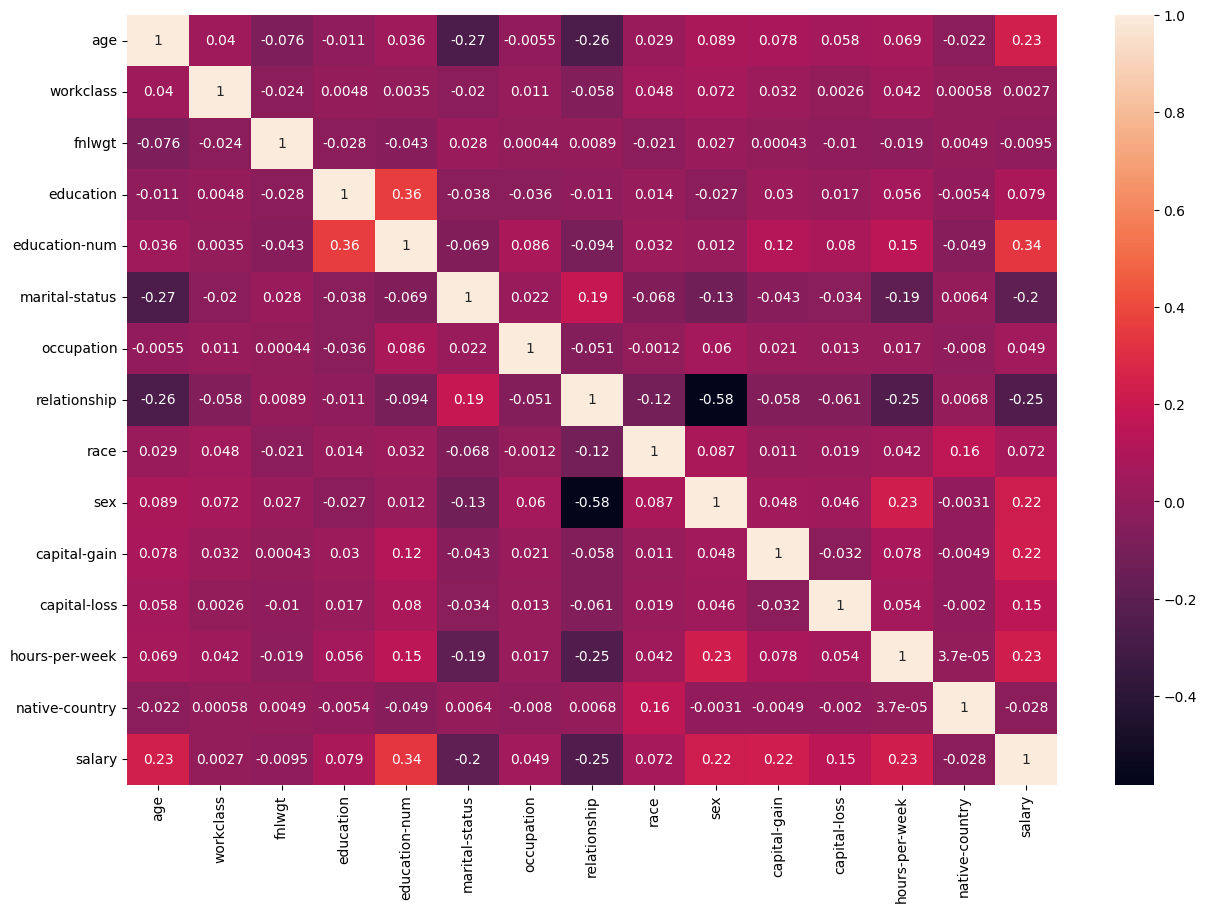

In [26]:
#co_relation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),fmt='.2g',annot=True)
plt.show()

In [27]:

X = df.drop('salary', axis=1)
y = df['salary']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state=0)

In [28]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [29]:

from scipy import stats

selected_columns = ['age','fnlwgt','capital-gain','capital-loss','hours-per-week']

z_scores = np.abs(stats.zscore(X_train[selected_columns]))

threshold = 3

outlier_indices = np.where(z_scores > threshold)[0]

X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])
     

In [30]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier(random_state=0,max_depth=8,min_samples_leaf=2,
                               min_samples_split=2,class_weight='balanced')
dtree.fit(X_train,y_train)
     

DecisionTreeClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=2,
                       random_state=0)

In [31]:
from sklearn.metrics import accuracy_score, f1_score , precision_score, recall_score,jaccard_score,log_loss
y_pred = dtree.predict(X_test)

print("Accuracy Score : ", round(accuracy_score(y_test,y_pred)*100,2),"%")
print("F1-Score : ", (f1_score(y_test,y_pred, average='micro')))
print("Precision Score : ", (precision_score(y_test,y_pred, average='micro')))
print("Recall Score : ", (recall_score(y_test,y_pred, average='micro')))
print("Jaccad Score : ", (jaccard_score(y_test,y_pred, average='micro')))
print("Log Loss : ", (log_loss(y_test,y_pred,)))
     

Accuracy Score :  80.67 %
F1-Score :  0.806699446834665
Precision Score :  0.806699446834665
Recall Score :  0.806699446834665
Jaccad Score :  0.6760236930208602
Log Loss :  6.967258138215946


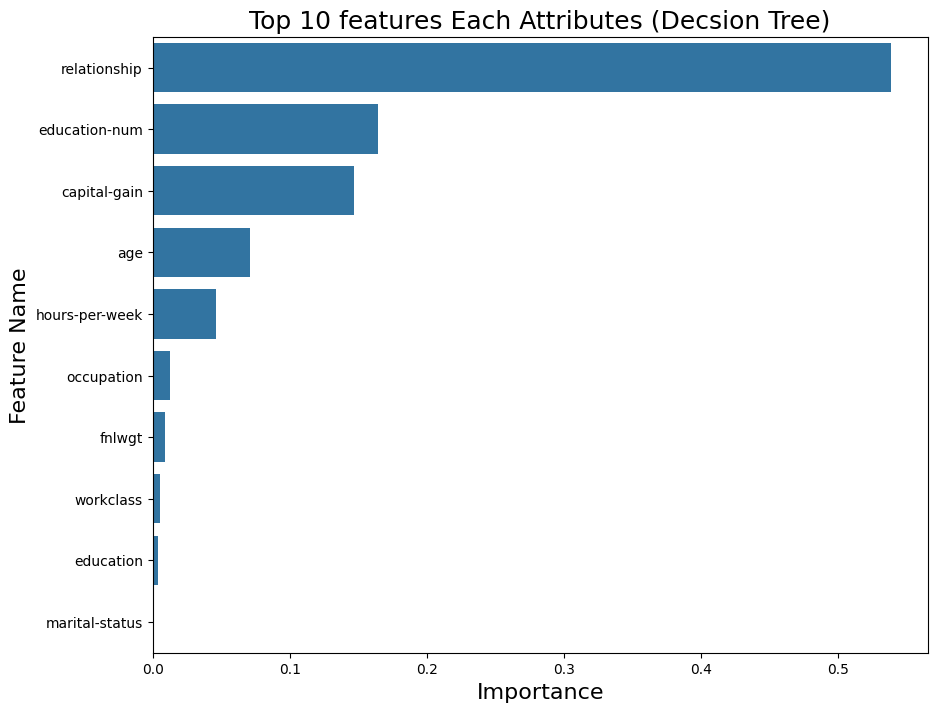

In [32]:

imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2,x="Importance",y="Feature Name")
plt.title("Top 10 features Each Attributes (Decsion Tree)",fontsize=18)
plt.xlabel("Importance",fontsize=16)
plt.ylabel("Feature Name",fontsize=16)
plt.show()